In [1]:
#data preprocessing 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import os 

os.chdir("F:\Training Python")
data=pd.read_csv("marketing_analysis.csv")

data

C:\Users\arindam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [2]:
# this is called fixing rows and coloumns. 

data=pd.read_csv("Marketing_Analysis.csv",skiprows=2)

data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
#drop the customer id as it is of no use.

#data.drop('customerid',axis=1,inplace=True)

#extract job & education in newly from "jobedu" column 

data['job']=data['jobedu'].apply(lambda x:x.split(",")[0])
data['education']=data["jobedu"].apply(lambda x:x.split(",")[1])

#drop the "jobedu" column from dataframe

data.drop('jobedu',axis=1,inplace=True)

data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [6]:
#missing values

data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [7]:
#dropping the records with age missing in dataframe 

data=data[~data.age.isnull()].copy()

In [8]:
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [9]:
#impute values to the missing values for the month column 

#find the mode of month in data 

month_mode=data.month.mode()[0]

#fill the missing values with mode value of month in data 

data.month.fillna(month_mode,inplace=True)

data.month.isnull().sum()

0

In [10]:
month_mode

'may, 2017'

In [11]:
#dropping the records with age missing in dataframe 

data=data[~data.response.isnull()].copy()

data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

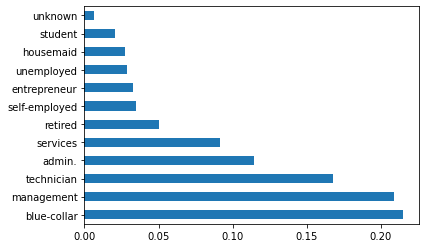

In [12]:
#standradizing values 

#lets calculate the percentage of each job category 

data.job.value_counts(normalize=True)

#plot the bar graph of percentage job categories 

data.job.value_counts(normalize=True).plot.barh()
plt.show()


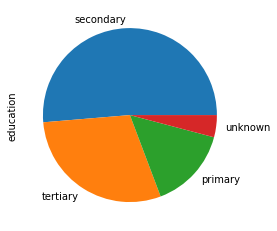

In [14]:
d=data.education.value_counts(normalize=True)

#plot the pie chart of education categories 

data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [15]:
d

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

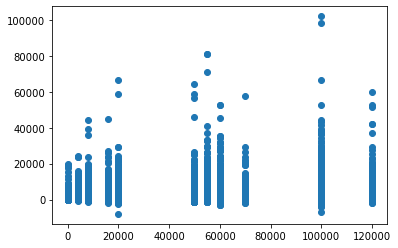

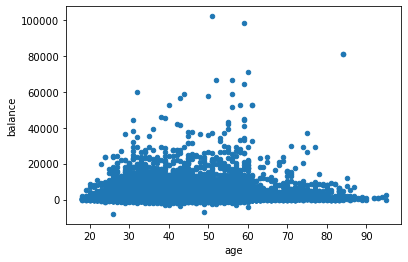

In [20]:
#bivariate analysis 
#plot the scatter plot of balance and salary variable in data
plt.scatter(data.salary,data.balance)
plt.show()

#plot the scatter plot of balance and age variable in data 

data.plot.scatter(x="age",y="balance")
plt.show()

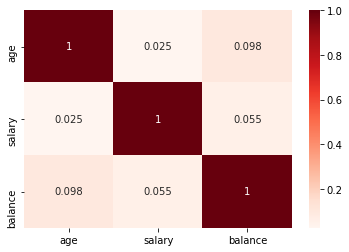

In [23]:
#correlation 

data[['age','salary','balance']].corr() 

sns.heatmap(data[['age','salary','balance']].corr(),annot=True,cmap='Reds')
plt.show()


In [24]:
#removing Duplicates 

import pandas as pd 

data=pd.DataFrame([[1,2,2,3,3,3,4,4],
                  ['a','b','b','c','c','c','d','c'],
                  ['A','B','B','C','C','C','D','D']])

data=data.transpose()

In [25]:
data

,0,1,2
0,1,a,A
1,2,b,B
2,2,b,B
3,3,c,C
4,3,c,C
5,3,c,C
6,4,d,D
7,4,c,D


In [26]:
data.columns=['col1','col2','col3']
data

,col1,col2,col3
0,1,a,A
1,2,b,B
2,2,b,B
3,3,c,C
4,3,c,C
5,3,c,C
6,4,d,D
7,4,c,D


In [27]:
data.drop_duplicates()

,col1,col2,col3
0,1,a,A
1,2,b,B
3,3,c,C
6,4,d,D
7,4,c,D


In [28]:
data.transpose()

,0,1,2,3,4,5,6,7
col1,1,2,2,3,3,3,4,4
col2,a,b,b,c,c,c,d,c
col3,A,B,B,C,C,C,D,D
